In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [45]:
df=pd.read_csv('C:\\Users\\admin\\Downloads\\mnist-in-csv\\mnist_train.csv')

In [46]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
x=df.iloc[:,1:]
y=df.iloc[:,0]
X=x.values
Y=y.values

In [48]:
split=int(0.8*X.shape[0])
print(split)

X_train=X[:split,:]
Y_train=Y[:split]

X_test=X[split:,:]
Y_test=Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

48000
(48000, 784) (48000,)
(12000, 784) (12000,)


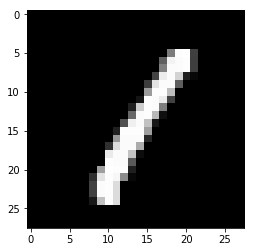

1


In [49]:
def drawimg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
drawimg(X_train[3])
print(Y_train[3])
    

In [50]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,query_point,k=5):
    
    vals=[]
    m=X.shape[0]
    
    for i in range(m):
        d=dist(query_point,X[i])
        vals.append((d,Y[i]))
        
    vals=sorted(vals)
    vals=vals[:k]
    
    vals=np.array(vals)
    
    new_vals=np.unique(vals[:,1],return_counts=True)
    
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    
    return pred


In [ ]:
pred=knn(X_train,Y_train,X_test[0])
print(int(pred))

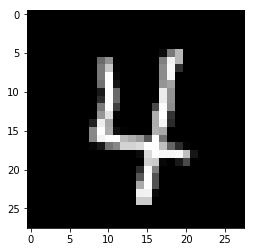

In [52]:
drawimg(X_test[0])

In [68]:
def accuracy(Y_test,pred):
    correct=0
    for x in range(len(Y_test)):
        if Y_test[x] is pred[x]:
            correct+=1
    return(correct/float(len(Y_test)))*100
            

In [ ]:
ac=accuracy(Y_test,pred)